# This notebook will  be used for the Capstone Project

In [1]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
import numpy as np
import json
import requests
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [3]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: ...working... done

# All requested packages already installed.



### Find the geo center of Austin Texas

In [4]:
address = 'Austin, Texas'

geolocator = Nominatim(user_agent="ATX_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin are 30.2711286, -97.7436995.


In [5]:
#Load csv file with center of each Neighborhood and merge with dataframe
pd.set_option("display.precision", 20)
df = pd.read_csv('Austin_Locations.csv')
df.rename( columns = {'Mean(latitude)':'Latitude','Mean(Longitude)':'Longitude'}, inplace = True)
df.head()

,planning_a,Latitude,Longitude
0,ALLANDALE,30.32467877584739213148,-97.74342362155894647913
1,BARTON HILLS,30.23299459021646029555,-97.80502139915436998763
2,BOULDIN CREEK,30.24384733705153394112,-97.76428701908821494726
3,BRENTWOOD,30.31816452613460199927,-97.73972426104590738305
4,CENTRAL EAST AUSTIN,30.26610445164784124472,-97.71519137937255550241


### Save Austin geocode .csv File and load data to dataframe via Pandas

In [6]:
df_nhood = pd.read_csv("https://data.austintexas.gov/api/views/nz5f-3t2e/rows.csv")
df_nhood.head()

,the_geom,_feature_i,planning_a,shape_area,shape_leng,label
0,MULTIPOLYGON (((-97.73974072167768 30.32807941...,1,ALLANDALE,6.57926895530999973416e+07,42253.10721049999847309664,Allandale
1,MULTIPOLYGON (((-97.79626881206823 30.23397534...,2,BARTON HILLS,8.89017147946999967098e+07,48353.93392540000058943406,Barton Hills
2,MULTIPOLYGON (((-97.75962228824444 30.24211128...,3,BOULDIN CREEK,3.32589999494000002742e+07,25667.34037559999705990776,Bouldin Creek
3,MULTIPOLYGON (((-97.73691608784935 30.31449049...,4,BRENTWOOD,4.42077560680000036955e+07,29612.40369760000248788856,Brentwood
4,MULTIPOLYGON (((-97.71924515686447 30.27073344...,5,CENTRAL EAST AUSTIN,2.69709838605999983847e+07,22198.52989689999958500266,Central East Austin


In [7]:
#Rename Columns
pd.options.display.max_colwidth = 1000
new_columns = ['label', '_feature_i', 'shape_area', 'shape_leng', 'planning_a', 'the_geom']
df_nhood = df_nhood[new_columns]
df_nhood.head()

,label,_feature_i,shape_area,shape_leng,planning_a,the_geom
0,Allandale,1,6.57926895530999973416e+07,42253.10721049999847309664,ALLANDALE,"MULTIPOLYGON (((-97.73974072167768 30.32807941164518, -97.73961671778892 30.32585186555104, -97.73945876117553 30.323678639486825, -97.7394061794324 30.323089560775426, -97.73935398371955 30.322504872547164, -97.7393364354213 30.32215524866581, -97.73932376805809 30.322005316810635, -97.73933394916791 30.322012150533226, -97.74388292997251 30.3250689857587, -97.74496240916602 30.325602354187637, -97.7461492656547 30.326181974993922, -97.74611773878604 30.326057163661755, -97.74608636132103 30.325971043324568, -97.74603680120623 30.325852131226895, -97.74591139984481 30.32564276798442, -97.74585631733652 30.32542454429572, -97.74583753629344 30.325245309893337, -97.74581374977839 30.3250186131495, -97.74575604787861 30.324736115839563, -97.74574714243622 30.3245811182764, -97.74579713601909 30.32417810106868, -97.74579432216218 30.323995778966253, -97.74579150976159 30.323776711654062, -97.74585868607396 30.323543957975538, -97.74593202448665 30.32324333974517, -97.7458946647791 30...."
1,Barton Hills,2,8.89017147946999967098e+07,48353.93392540000058943406,BARTON HILLS,"MULTIPOLYGON (((-97.79626881206823 30.233975341197624, -97.79767438108584 30.233279845468587, -97.7989681757489 30.232950667503445, -97.80043822614961 30.232572694855445, -97.80184834126004 30.23224578927533, -97.80317771280009 30.232068530588794, -97.80291091794417 30.232519813576843, -97.80324554687266 30.2324714198441, -97.8039660276678 30.232353626320407, -97.80447807666839 30.23233348910369, -97.80473586220118 30.2323468256742, -97.80508070900181 30.23236188203258, -97.80579133310651 30.232439172598465, -97.8061663267978 30.232512571649057, -97.80681695154841 30.23270417684307, -97.80800653888447 30.233178687459578, -97.80896892977493 30.23356069919021, -97.80946307124509 30.23374094854879, -97.80987053006731 30.23387549533953, -97.81048857069808 30.23401143292261, -97.81110229247948 30.234100525705454, -97.81100344732562 30.23427734906443, -97.80892215261414 30.237500948398647, -97.80840930559701 30.238277431322306, -97.80806698095688 30.23880148880592, -97.80731812266771 30...."
2,Bouldin Creek,3,3.32589999494000002742e+07,25667.34037559999705990776,BOULDIN CREEK,"MULTIPOLYGON (((-97.75962228824444 30.24211128600526, -97.76030973269576 30.242435881444088, -97.7605138224694 30.24253349519943, -97.76127845685814 30.2427551252591, -97.76136572422122 30.242778878196713, -97.76224568813632 30.24304132511802, -97.76290363053721 30.24325529962289, -97.76314075446278 30.2433315621899, -97.76374071465386 30.24352236911122, -97.76389618576069 30.243572244878834, -97.76397444754944 30.24363707106856, -97.76405191588498 30.243701880392223, -97.76433387764126 30.24393856572656, -97.76504942035392 30.24424994709964, -97.76507992160843 30.244264310204755, -97.76622115559917 30.244619979184225, -97.76638446773148 30.24467275661751, -97.76747152888116 30.245010821417296, -97.76781003922821 30.245116608171713, -97.76789760410423 30.245159616573126, -97.76844076422557 30.245431773994103, -97.76858227909368 30.24550061765869, -97.76871793117304 30.245671100100157, -97.76896232156487 30.245981283117864, -97.76898835944549 30.246014809946217, -97.76830680689332 3..."
3,Brentwood,4,4.42077560680000036955e+07,29612.40369760000248788856,BRENTWOOD,"MULTIPOLYGON (((-97.73691608784935 30.314490492558804, -97.73757137548624 30.313464131880586, -97.7387763147424 30.314041350951268, -97.73964896280683 30.31447981193477, -97.74031829176971 30.314787641213265, -97.74056016946454 30.314899792475217, -97.7413476854314 30.31529251512932, -97.74146105943622 30.31534981520721, -97.74152368748148 30.31537861194156, -97.7415674587455 30.31540147077539, -97.74076869049611 30.316694490874053, -97.73991205842215 30.318019332893954, -97.73956053247021 30.31859529726216, -97.73918394817257 30.319278012722734, -97.73912342923238 30.319642591444428, -97.73919814540

In [8]:
#Drop unecessary columns
df_nhood.drop(['shape_area','shape_leng','label'], axis=1, inplace=True)
df_nhood.rename( columns = {'planning_a':'Neighborhood'}, inplace = True)
df_nhood.head()

,_feature_i,Neighborhood,the_geom
0,1,ALLANDALE,"MULTIPOLYGON (((-97.73974072167768 30.32807941164518, -97.73961671778892 30.32585186555104, -97.73945876117553 30.323678639486825, -97.7394061794324 30.323089560775426, -97.73935398371955 30.322504872547164, -97.7393364354213 30.32215524866581, -97.73932376805809 30.322005316810635, -97.73933394916791 30.322012150533226, -97.74388292997251 30.3250689857587, -97.74496240916602 30.325602354187637, -97.7461492656547 30.326181974993922, -97.74611773878604 30.326057163661755, -97.74608636132103 30.325971043324568, -97.74603680120623 30.325852131226895, -97.74591139984481 30.32564276798442, -97.74585631733652 30.32542454429572, -97.74583753629344 30.325245309893337, -97.74581374977839 30.3250186131495, -97.74575604787861 30.324736115839563, -97.74574714243622 30.3245811182764, -97.74579713601909 30.32417810106868, -97.74579432216218 30.323995778966253, -97.74579150976159 30.323776711654062, -97.74585868607396 30.323543957975538, -97.74593202448665 30.32324333974517, -97.7458946647791 30...."
1,2,BARTON HILLS,"MULTIPOLYGON (((-97.79626881206823 30.233975341197624, -97.79767438108584 30.233279845468587, -97.7989681757489 30.232950667503445, -97.80043822614961 30.232572694855445, -97.80184834126004 30.23224578927533, -97.80317771280009 30.232068530588794, -97.80291091794417 30.232519813576843, -97.80324554687266 30.2324714198441, -97.8039660276678 30.232353626320407, -97.80447807666839 30.23233348910369, -97.80473586220118 30.2323468256742, -97.80508070900181 30.23236188203258, -97.80579133310651 30.232439172598465, -97.8061663267978 30.232512571649057, -97.80681695154841 30.23270417684307, -97.80800653888447 30.233178687459578, -97.80896892977493 30.23356069919021, -97.80946307124509 30.23374094854879, -97.80987053006731 30.23387549533953, -97.81048857069808 30.23401143292261, -97.81110229247948 30.234100525705454, -97.81100344732562 30.23427734906443, -97.80892215261414 30.237500948398647, -97.80840930559701 30.238277431322306, -97.80806698095688 30.23880148880592, -97.80731812266771 30...."
2,3,BOULDIN CREEK,"MULTIPOLYGON (((-97.75962228824444 30.24211128600526, -97.76030973269576 30.242435881444088, -97.7605138224694 30.24253349519943, -97.76127845685814 30.2427551252591, -97.76136572422122 30.242778878196713, -97.76224568813632 30.24304132511802, -97.76290363053721 30.24325529962289, -97.76314075446278 30.2433315621899, -97.76374071465386 30.24352236911122, -97.76389618576069 30.243572244878834, -97.76397444754944 30.24363707106856, -97.76405191588498 30.243701880392223, -97.76433387764126 30.24393856572656, -97.76504942035392 30.24424994709964, -97.76507992160843 30.244264310204755, -97.76622115559917 30.244619979184225, -97.76638446773148 30.24467275661751, -97.76747152888116 30.245010821417296, -97.76781003922821 30.245116608171713, -97.76789760410423 30.245159616573126, -97.76844076422557 30.245431773994103, -97.76858227909368 30.24550061765869, -97.76871793117304 30.245671100100157, -97.76896232156487 30.245981283117864, -97.76898835944549 30.246014809946217, -97.76830680689332 3..."
3,4,BRENTWOOD,"MULTIPOLYGON (((-97.73691608784935 30.314490492558804, -97.73757137548624 30.313464131880586, -97.7387763147424 30.314041350951268, -97.73964896280683 30.31447981193477, -97.74031829176971 30.314787641213265, -97.74056016946454 30.314899792475217, -97.7413476854314 30.31529251512932, -97.74146105943622 30.31534981520721, -97.74152368748148 30.31537861194156, -97.7415674587455 30.31540147077539, -97.74076869049611 30.316694490874053, -97.73991205842215 30.318019332893954, -97.73956053247021 30.31859529726216, -97.73918394817257 30.319278012722734, -97.73912342923238 30.319642591444428, -97.7391981454079 30.32051871185971, -97.73932376805809 30.322005316810635, -97.7393364354213 30.32215524866581, -97.73935398371955 30.322504872547164, -97.7394061794324 30.323089560775426, -97.73945876117553 30.323678639486825, -97.73961671778892 30.32585186555104, -97.73974072167768 30.32807941164518,

### Austin Map

In [9]:
# create map of Austin using latitude and longitude values
atx_map = folium.Map(location=[latitude, longitude], zoom_start=10)
atx_map

In [10]:
CLIENT_ID = 'L3F2OS5MSPHUBVC3O2Y3U5FN4PUFMFFNZUV2152KNABOIRYE' # your Foursquare ID
CLIENT_SECRET = 'GJY3V4A55QP3STU0LU1LUXRX4J5PT4ESZUJSD14QKLBUTNWL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L3F2OS5MSPHUBVC3O2Y3U5FN4PUFMFFNZUV2152KNABOIRYE
CLIENT_SECRET:GJY3V4A55QP3STU0LU1LUXRX4J5PT4ESZUJSD14QKLBUTNWL


In [11]:
df.head()

,planning_a,Latitude,Longitude
0,ALLANDALE,30.32467877584739213148,-97.74342362155894647913
1,BARTON HILLS,30.23299459021646029555,-97.80502139915436998763
2,BOULDIN CREEK,30.24384733705153394112,-97.76428701908821494726
3,BRENTWOOD,30.31816452613460199927,-97.73972426104590738305
4,CENTRAL EAST AUSTIN,30.26610445164784124472,-97.71519137937255550241


In [12]:
for lat, lng, planning_a in zip(df['Latitude'], df['Longitude'], df['planning_a']):
    
    label = '{}'.format(planning_a)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(atx_map)  
    
atx_map

In [13]:
df.loc[0, 'planning_a']

'ALLANDALE'

In [14]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'planning_a'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of ALLANDALE are 30.324678775847392, -97.74342362155895.


In [15]:
LIMIT = 200 # limit of number of venues returned by Foursquare API

radius = 900 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=L3F2OS5MSPHUBVC3O2Y3U5FN4PUFMFFNZUV2152KNABOIRYE&client_secret=GJY3V4A55QP3STU0LU1LUXRX4J5PT4ESZUJSD14QKLBUTNWL&v=20180605&ll=30.324678775847392,-97.74342362155895&radius=900&limit=200'

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# type your answer here
atx_venues = getNearbyVenues(names=df['planning_a'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

ALLANDALE
BARTON HILLS
BOULDIN CREEK
BRENTWOOD
CENTRAL EAST AUSTIN
CHESTNUT
CORONADO HILLS
CRESTVIEW
DAWSON
DOWNTOWN
EAST CESAR CHAVEZ
EAST CONGRESS
EAST OAK HILL
FRANKLIN PARK
GALINDO
GARRISON PARK
GATEWAY
GEORGIAN ACRES
GOVALLE
HANCOCK
HERITAGE HILLS
HIGHLAND
HOLLY
HYDE PARK
JOHNSTON TERRACE
MCKINNEY
MLK
MLK-183
MONTOPOLIS
NORTH AUSTIN CIVIC ASSOCIATION
NORTH BURNET
NORTH LAMAR
NORTH LOOP
NORTH SHOAL CREEK
NORTH UNIVERSITY
OLD ENFIELD
OLD WEST AUSTIN
PARKER LANE
PECAN SPRINGS-SPRINGDALE
PLEASANT VALLEY
RIVERSIDE
RMMA
ROSEDALE
ROSEWOOD
SOUTH LAMAR
SOUTH MANCHACA
SOUTH RIVER CITY
SOUTHEAST
ST. EDWARDS
ST. JOHN
SWEETBRIAR
TRIANGLE STATE
UNIVERSITY HILLS
UPPER BOGGY CREEK
UT
WEST AUSTIN NEIGHBORHOOD GROUP
WEST CONGRESS
WEST OAK HILL
WEST UNIVERSITY
WESTGATE
WINDSOR HILLS
WINDSOR PARK
WINDSOR ROAD
WOOTEN
ZILKER


In [19]:
print(atx_venues.shape)
atx_venues.head()

(1040, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALLANDALE,30.32467877584739213148,-97.74342362155894647913,Fonda San Miguel,30.32525528487262533872,-97.74352691956637784187,Mexican Restaurant
1,ALLANDALE,30.32467877584739213148,-97.74342362155894647913,Epicerie,30.32465480637577215361,-97.74373037407913500374,French Restaurant
2,ALLANDALE,30.32467877584739213148,-97.74342362155894647913,Sarah's Mediterranean Grill & Market,30.32471865216120576747,-97.73991220146291425408,Falafel Restaurant
3,ALLANDALE,30.32467877584739213148,-97.74342362155894647913,Chi'lantro,30.32473301088046824248,-97.74002795953423117226,Korean Restaurant
4,ALLANDALE,30.32467877584739213148,-97.74342362155894647913,Austin Cake Ball,30.32650691626494321440,-97.74064273699940486040,Bakery


In [20]:
atx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALLANDALE,33,33,33,33,33,33
BARTON HILLS,11,11,11,11,11,11
BOULDIN CREEK,10,10,10,10,10,10
BRENTWOOD,24,24,24,24,24,24
CENTRAL EAST AUSTIN,16,16,16,16,16,16
CHESTNUT,19,19,19,19,19,19
CORONADO HILLS,6,6,6,6,6,6
CRESTVIEW,4,4,4,4,4,4
DAWSON,23,23,23,23,23,23


In [21]:
print('There are {} uniques categories.'.format(len(atx_venues['Venue Category'].unique())))

There are 214 uniques categories.


## 3. One Hot Encoding for Neighborhood profiles

In [22]:
# one hot encoding
atx_onehot = pd.get_dummies(atx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
atx_onehot['Neighborhood'] = atx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [atx_onehot.columns[-1]] + list(atx_onehot.columns[:-1])
atx_onehot = atx_onehot[fixed_columns]

atx_onehot.head()

,Neighborhood,ATM,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Quad,Comic Shop,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,English Restaurant,Ethiopian Restaurant,Eye Doctor,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gift Shop,Gourmet Shop,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Laundromat,Lighthouse,Liquor Store,Locksmith,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Office,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,RV Park,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,ALLANDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALLANDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ALLANDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [23]:
atx_onehot.shape

(1040, 215)

In [40]:
atx_grouped = atx_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5

for hood in atx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = atx_grouped[atx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALLANDALE----
                venue                    freq
0          Taco Place  0.08999999999999999667
1      Sandwich Place  0.05999999999999999778
2              Bakery  0.05999999999999999778
3  Mexican Restaurant  0.05999999999999999778
4                 Gym  0.02999999999999999889


----BARTON HILLS----
                 venue                    freq
0    Mobile Phone Shop  0.17999999999999999334
1          Yoga Studio  0.08999999999999999667
2  American Restaurant  0.08999999999999999667
3            Juice Bar  0.08999999999999999667
4         Dance Studio  0.08999999999999999667


----BOULDIN CREEK----
                venue                    freq
0  Mexican Restaurant  0.10000000000000000555
1        Liquor Store  0.10000000000000000555
2         Beer Garden  0.10000000000000000555
3          Food Truck  0.10000000000000000555
4                Park  0.10000000000000000555


----BRENTWOOD----
          venue                    freq
0        Bakery  0.08000000000000000167
1

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = atx_grouped['Neighborhood']

for ind in np.arange(atx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(atx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALLANDALE,Taco Place,Mexican Restaurant,Bakery,Sandwich Place,Discount Store,Coffee Shop,Donut Shop,Clothing Store,Salon / Barbershop,Furniture / Home Store
1,BARTON HILLS,Mobile Phone Shop,Asian Restaurant,Farmers Market,Szechuan Restaurant,Thai Restaurant,Juice Bar,Athletics & Sports,Yoga Studio,Dance Studio,American Restaurant
2,BOULDIN CREEK,Park,Mexican Restaurant,Tennis Court,Beer Garden,Liquor Store,Taco Place,Dive Bar,Food Truck,Deli / Bodega,American Restaurant
3,BRENTWOOD,Bakery,Coffee Shop,Yoga Studio,Pizza Place,Convenience Store,Pet Store,Restaurant,Doctor's Office,Salon / Barbershop,Donut Shop
4,CENTRAL EAST AUSTIN,Coffee Shop,Pub,Food Truck,Boutique,Taco Place,English Restaurant,Park,Bar,Cocktail Bar,Gift Shop


## 4. Clustering the Neighborhoods

In [27]:
# set number of clusters
kclusters = 3

atx_grouped_clustering = atx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(atx_grouped_clustering)

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

atx_merged = df

atx_merged = atx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='planning_a')

atx_merged.head()

,planning_a,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALLANDALE,30.32467877584739213148,-97.74342362155894647913,1.0,Taco Place,Mexican Restaurant,Bakery,Sandwich Place,Discount Store,Coffee Shop,Donut Shop,Clothing Store,Salon / Barbershop,Furniture / Home Store
1,BARTON HILLS,30.23299459021646029555,-97.80502139915436998763,1.0,Mobile Phone Shop,Asian Restaurant,Farmers Market,Szechuan Restaurant,Thai Restaurant,Juice Bar,Athletics & Sports,Yoga Studio,Dance Studio,American Restaurant
2,BOULDIN CREEK,30.24384733705153394112,-97.76428701908821494726,1.0,Park,Mexican Restaurant,Tennis Court,Beer Garden,Liquor Store,Taco Place,Dive Bar,Food Truck,Deli / Bodega,American Restaurant
3,BRENTWOOD,30.31816452613460199927,-97.73972426104590738305,1.0,Bakery,Coffee Shop,Yoga Studio,Pizza Place,Convenience Store,Pet Store,Restaurant,Doctor's Office,Salon / Barbershop,Donut Shop
4,CENTRAL EAST AUSTIN,30.26610445164784124472,-97.71519137937255550241,1.0,Coffee Shop,Pub,Food Truck,Boutique,Taco Place,English Restaurant,Park,Bar,Cocktail Bar,Gift Shop


In [29]:
atx_merged = atx_merged[atx_merged['Cluster Labels'].notna()]
atx_merged.dtypes

planning_a                 object
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [30]:
atx_merged['Cluster Labels'].astype(int)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
26    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    0
40    1
41    2
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
60    1
61    1
62    1
63    1
64    1
Name: Cluster Labels, dtype: int32

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(atx_merged['Latitude'], atx_merged['Longitude'], atx_merged['planning_a'], atx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Get home values by using Zillow csv file and merge with the existing pandas dataframe

In [32]:
zillow = pd.read_csv('Zillow_Austin.csv')

In [33]:
#rename columns
zillow.rename( columns = {'11/30/2020':'Avg Price'}, inplace = True)

In [34]:
atx_merged['planning_a'].astype('|S')
atx_merged['planning_a'] = atx_merged['planning_a'].str.lower()
atx_merged.head()

,planning_a,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,allandale,30.32467877584739213148,-97.74342362155894647913,1.0,Taco Place,Mexican Restaurant,Bakery,Sandwich Place,Discount Store,Coffee Shop,Donut Shop,Clothing Store,Salon / Barbershop,Furniture / Home Store
1,barton hills,30.23299459021646029555,-97.80502139915436998763,1.0,Mobile Phone Shop,Asian Restaurant,Farmers Market,Szechuan Restaurant,Thai Restaurant,Juice Bar,Athletics & Sports,Yoga Studio,Dance Studio,American Restaurant
2,bouldin creek,30.24384733705153394112,-97.76428701908821494726,1.0,Park,Mexican Restaurant,Tennis Court,Beer Garden,Liquor Store,Taco Place,Dive Bar,Food Truck,Deli / Bodega,American Restaurant
3,brentwood,30.31816452613460199927,-97.73972426104590738305,1.0,Bakery,Coffee Shop,Yoga Studio,Pizza Place,Convenience Store,Pet Store,Restaurant,Doctor's Office,Salon / Barbershop,Donut Shop
4,central east austin,30.26610445164784124472,-97.71519137937255550241,1.0,Coffee Shop,Pub,Food Truck,Boutique,Taco Place,English Restaurant,Park,Bar,Cocktail Bar,Gift Shop


In [35]:
zillow['RegionName'].astype('|S')
zillow['RegionName'] = zillow['RegionName'].str.lower()
zillow.head()

,RegionName,Avg Price
0,north austin,381023
1,franklin park,277638
2,pleasant valley,394907
3,windsor park,458763
4,west university,819775


In [36]:
profile = atx_merged.join(zillow.set_index('RegionName'), on='planning_a')
profile.head()

,planning_a,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Avg Price
0,allandale,30.32467877584739213148,-97.74342362155894647913,1.0,Taco Place,Mexican Restaurant,Bakery,Sandwich Place,Discount Store,Coffee Shop,Donut Shop,Clothing Store,Salon / Barbershop,Furniture / Home Store,712071.0
1,barton hills,30.23299459021646029555,-97.80502139915436998763,1.0,Mobile Phone Shop,Asian Restaurant,Farmers Market,Szechuan Restaurant,Thai Restaurant,Juice Bar,Athletics & Sports,Yoga Studio,Dance Studio,American Restaurant,997505.0
2,bouldin creek,30.24384733705153394112,-97.76428701908821494726,1.0,Park,Mexican Restaurant,Tennis Court,Beer Garden,Liquor Store,Taco Place,Dive Bar,Food Truck,Deli / Bodega,American Restaurant,987433.0
3,brentwood,30.31816452613460199927,-97.73972426104590738305,1.0,Bakery,Coffee Shop,Yoga Studio,Pizza Place,Convenience Store,Pet Store,Restaurant,Doctor's Office,Salon / Barbershop,Donut Shop,579901.0
4,central east austin,30.26610445164784124472,-97.71519137937255550241,1.0,Coffee Shop,Pub,Food Truck,Boutique,Taco Place,English Restaurant,Park,Bar,Cocktail Bar,Gift Shop,572661.0


In [45]:
df = profile.sort_values('Avg Price', ascending=False)
df.head()

,planning_a,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Avg Price
9,downtown,30.27962908045841317062,-97.73648465643844929218,1.0,Hotel,Movie Theater,Art Museum,Pool,Beer Garden,History Museum,Japanese Restaurant,Frozen Yogurt Shop,New American Restaurant,Park,1383616.0
36,old west austin,30.27764508694448863935,-97.75131758960390016000,1.0,Pet Store,Sports Bar,Scenic Lookout,Board Shop,Steakhouse,Soup Place,Soccer Stadium,Mexican Restaurant,Skate Park,Sandwich Place,1181039.0
64,zilker,30.24656332811116143944,-97.77683629826923095152,1.0,Liquor Store,Coffee Shop,Yoga Studio,Bakery,Gym,Gas Station,Mexican Restaurant,Mobile Phone Shop,Fast Food Restaurant,Music Venue,1088745.0
1,barton hills,30.23299459021646029555,-97.80502139915436998763,1.0,Mobile Phone Shop,Asian Restaurant,Farmers Market,Szechuan Restaurant,Thai Restaurant,Juice Bar,Athletics & Sports,Yoga Studio,Dance Studio,American Restaurant,997505.0
2,bouldin creek,30.24384733705153394112,-97.76428701908821494726,1.0,Park,Mexican Restaurant,Tennis Court,Beer Garden,Liquor Store,Taco Place,Dive Bar,Food Truck,Deli / Bodega,American Restaurant,987433.0


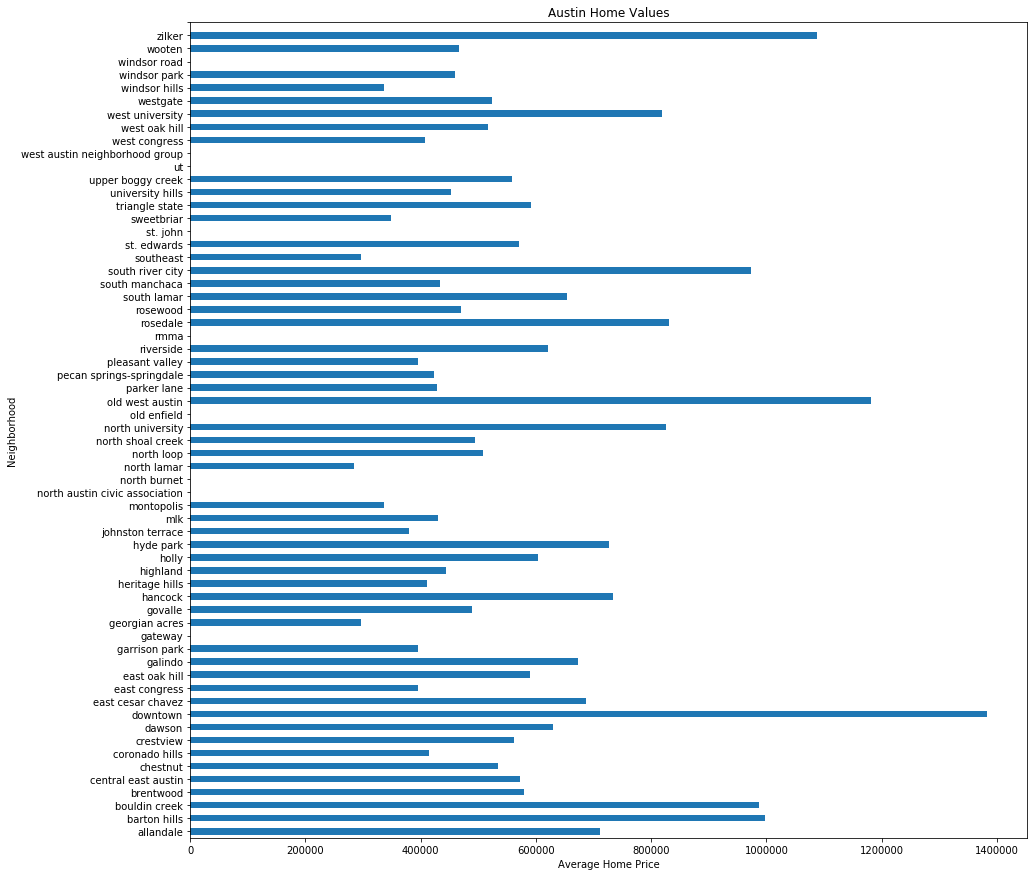

In [38]:
#Plot Home Value Data
import matplotlib.pyplot as plt
profile[['planning_a', 'Avg Price']].plot(kind='barh', figsize=(15, 15), legend = None)

plt.xlabel('Average Home Price') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Austin Home Values') # add title to the plot
plt.yticks (np.arange(63), profile['planning_a'])
plt.show()